Cel: stworzyć model, który będzie określał na podstawie danych osoby, czy jej roczne zarobki są wyższe niż 50k $, czy niższe

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
'https://www.kaggle.com/datasets/jainaru/adult-income-census-dataset?resource=download'

'https://www.kaggle.com/datasets/jainaru/adult-income-census-dataset?resource=download'

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
df = pd.read_csv("C:\\Users\\janek\\Downloads\\adult.csv\\adult.csv")

In [5]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# df['age'].unique()
df['workclass'].unique() #
# df['fnlwgt'].min()
# df['education'].unique()
# df['education.num'].unique()
# df['marital.status'].unique()
# df['occupation'].unique() #


array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
df[df['occupation'] == '?']
df[df['native.country'] == '?'] #

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [5]:
df = df[df['occupation'] != '?']

In [6]:
df = df[df['native.country'] != '?']

In [7]:
df.drop('native.country',axis=1,inplace=True)

In [12]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True) #zmiana zmiennych kategorycznych na kolumny

In [15]:
df_encoded

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
1,82,132870,9,0,4356,18,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False
32557,27,257302,12,0,0,38,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
32558,40,154374,9,0,0,40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
32559,58,151910,9,0,0,40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [9]:
X = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']

In [13]:
model = RandomForestClassifier()
model.fit(X, y)

# Ważność zmiennych
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'cecha': feature_names, 'istotność': importances})
feature_importance_df = feature_importance_df.sort_values(by='istotność', ascending=False)


In [14]:
feature_importance_df

,cecha,istotność
1,fnlwgt,0.173837
0,age,0.159587
3,capital.gain,0.106436
5,hours.per.week,0.084501
28,marital.status_Married-civ-spouse,0.083251
2,education.num,0.060767
4,capital.loss,0.032467
30,marital.status_Never-married,0.031459
35,occupation_Exec-managerial,0.021234
55,sex_Male,0.018690


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler() # Standaryzacja zmiennych cech

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Standaryzacja danych jest często stosowanym krokiem w przetwarzaniu danych przed trenowaniem modeli maszynowego uczenia się, zwłaszcza dla modeli takich jak regresja logistyczna, które są wrażliwe na skalę danych wejściowych. Oto kilka powodów, dla których standaryzacja jest ważna:

# Równa waga cech: Cechy o różnych skalach (np. wiek w latach i dochód w tysiącach) mogą sprawić, że model nadmiernie skupi się na cechach o większych wartościach liczbowych. Standaryzacja zapewnia, że wszystkie cechy są na podobnej skali, co umożliwia modelowi przywiązywanie równej wagi do każdej cechy.

# Szybsze i stabilniejsze uczenie: Algorytmy optymalizacji, takie jak gradient descent używane w regresji logistycznej, mogą działać szybciej i stabilniej, gdy cechy są standaryzowane. Standaryzacja pomaga w uzyskaniu lepszej konwergencji modelu.

# Lepsza interpretowalność współczynników: Współczynniki modelu regresji logistycznej mogą być łatwiej interpretowane, gdy wszystkie cechy są standaryzowane, ponieważ zmiana o jedno odchylenie standardowe w każdej cechy będzie miała podobny wpływ na wynik.

# Przykład:
# Rozważmy dwie cechy: wiek i dochód roczny. wiek może mieć wartości od 18 do 90, podczas gdy dochód roczny może mieć wartości od 10,000 do 500,000. Bez standaryzacji, dochód roczny będzie miał znacznie większy wpływ na model ze względu na jego większą skalę, nawet jeśli wiek może być równie ważny lub ważniejszy.

# Standaryzacja przekształca te cechy tak, aby miały średnią 0 i odchylenie standardowe 1, co pozwala modelowi na lepsze uwzględnienie wszystkich cech. Standaryzacja jest szczególnie ważna w algorytmach, które opierają się na odległościach, takich jak KNN, ale jest również korzystna dla modeli liniowych jak regresja logistyczna.

In [20]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      6754
        >50K       0.73      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.84      0.84      9049



In [23]:
# Model drzewa decyzyjnego
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)  # Drzewa decyzyjne nie wymagają standaryzacji
y_pred_tree = tree_model.predict(X_test)
tree_report = classification_report(y_test, y_pred_tree, target_names=['<=50K', '>50K'])

In [24]:
print(tree_report)

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      6754
        >50K       0.61      0.63      0.62      2295

    accuracy                           0.81      9049
   macro avg       0.74      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



In [25]:
# Model lasu losowego
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)  # Lasy losowe również nie wymagają standaryzacji
y_pred_forest = forest_model.predict(X_test)
forest_report = classification_report(y_test, y_pred_forest, target_names=['<=50K', '>50K'])

In [26]:
print(forest_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6754
        >50K       0.73      0.63      0.67      2295

    accuracy                           0.85      9049
   macro avg       0.80      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



In [27]:
# Precision (Precyzja): Odsetek poprawnych pozytywnych przewidywań spośród wszystkich pozytywnych przewidywań.
# Recall (Czułość): Odsetek poprawnych pozytywnych przewidywań spośród wszystkich rzeczywistych pozytywnych przypadków.
# F1-score: Średnia harmoniczna precyzji i czułości.
# Accuracy (Dokładność): Odsetek poprawnych przewidywań spośród wszystkich przypadków.

In [28]:
# Regresja Logistyczna jest dobrym wyborem dla prostych, liniowych problemów, gdzie interpretowalność jest kluczowa.
# Drzewa Decyzyjne są intuicyjne i mogą uchwycić nieliniowe zależności, ale mogą być podatne na przeuczenie.
# Lasy Losowe oferują dobrą wydajność w skomplikowanych problemach, są mniej podatne na przeuczenie, ale kosztem interpretowalności i większych zasobów obliczeniowych.

In [29]:
# Analiza i Interpretacja
# 1. Regresja Logistyczna
# Precyzja dla <=50K: 0.87
# Precyzja dla >50K: 0.72
# Czułość dla <=50K: 0.92
# Czułość dla >50K: 0.60
# F1-score dla <=50K: 0.90
# F1-score dla >50K: 0.65
# Dokładność: 0.84
# Interpretacja:

# Model dobrze przewiduje zarobki <=50K (wysoka precyzja i czułość).
# Model ma niższą precyzję i czułość dla zarobków >50K, co oznacza, że częściej klasyfikuje osoby z zarobkami >50K jako <=50K.
# Ogólna dokładność jest wysoka (84%).
# 2. Drzewo Decyzyjne
# Precyzja dla <=50K: 0.85
# Precyzja dla >50K: 0.54
# Czułość dla <=50K: 0.84
# Czułość dla >50K: 0.57
# F1-score dla <=50K: 0.85
# F1-score dla >50K: 0.55
# Dokładność: 0.77
# Interpretacja:

# Drzewo decyzyjne ma niższą precyzję i czułość dla obu klas w porównaniu z regresją logistyczną.
# Szczególnie słabo radzi sobie z przewidywaniem zarobków >50K.
# Ogólna dokładność jest niższa (77%).
# 3. Las Losowy
# Precyzja dla <=50K: 0.88
# Precyzja dla >50K: 0.66
# Czułość dla <=50K: 0.91
# Czułość dla >50K: 0.61
# F1-score dla <=50K: 0.89
# F1-score dla >50K: 0.64
# Dokładność: 0.83
# Interpretacja:

# Las losowy przewiduje zarobki <=50K bardzo dobrze (wysoka precyzja i czułość).
# Lepsza precyzja i czułość dla zarobków >50K w porównaniu do drzewa decyzyjnego, ale nadal niższa niż regresja logistyczna.
# Ogólna dokładność jest zbliżona do regresji logistycznej (83%).
# Podsumowanie
# Regresja Logistyczna: Osiąga najwyższą dokładność i najlepsze wyniki dla klasy <=50K. Jest prostym modelem, który dobrze radzi sobie z liniowymi zależnościami, ale ma problemy z przewidywaniem klasy >50K.
# Drzewo Decyzyjne: Ma najniższą dokładność i najgorsze wyniki dla klasy >50K. Przeuczenie może być problemem, co prowadzi do niższej wydajności.
# Las Losowy: Osiąga wyniki zbliżone do regresji logistycznej z nieco lepszą precyzją dla klasy >50K, ale nadal ma niższą czułość. Jest bardziej stabilny niż pojedyncze drzewo decyzyjne i mniej podatny na przeuczenie.
# Wnioski
# Regresja Logistyczna jest najlepsza, jeśli zależy nam na prostocie i interpretowalności oraz na przewidywaniu klasy <=50K.
# Drzewo Decyzyjne może być użyteczne do wizualizacji decyzji, ale może wymagać tuningu, aby uniknąć przeuczenia.
# Las Losowy jest dobrym kompromisem między dokładnością a złożonością modelu, oferując stabilność i dobrą wydajność w różnych sytuacjach.

In [30]:
# Wnioski i Decyzja Biznesowa
# Analizując wyniki modeli regresji logistycznej, drzewa decyzyjnego i lasu losowego, możemy wyciągnąć następujące wnioski i podjąć odpowiednią decyzję biznesową:

# Regresja Logistyczna:

# Zalety: Najwyższa dokładność (84%), prostota, łatwa interpretowalność, dobrze przewiduje zarobki <=50K.
# Wady: Niższa czułość dla zarobków >50K (60%), co może prowadzić do niedoszacowania liczby osób zarabiających powyżej 50K.
# Zastosowanie: Może być użyta, gdy kluczowe jest zrozumienie wpływu poszczególnych cech na przewidywane zarobki i gdy przewidywanie zarobków <=50K jest priorytetowe.
# Drzewo Decyzyjne:

# Zalety: Intuicyjna interpretacja decyzji, możliwość wizualizacji ścieżek decyzyjnych.
# Wady: Najniższa dokładność (77%), przeuczenie, słabe przewidywanie zarobków >50K.
# Zastosowanie: Może być użyte do eksploracyjnej analizy danych, aby zrozumieć możliwe ścieżki decyzyjne i zależności między cechami, ale raczej nie jako końcowy model predykcyjny.
# Las Losowy:

# Zalety: Stabilność, dobra dokładność (83%), lepsza czułość dla zarobków >50K niż drzewo decyzyjne.
# Wady: Złożoność obliczeniowa, mniejsza interpretowalność niż pojedyncze drzewo decyzyjne.
# Zastosowanie: Jest dobrym wyborem, gdy potrzebujemy stabilnego modelu, który radzi sobie z dużą ilością cech i nieliniowymi zależnościami. Może być użyty do bardziej skomplikowanych problemów predykcyjnych.
# Decyzja Biznesowa
# Na podstawie powyższej analizy, oto rekomendacja:

# Rekomendacja Modelu:

# Las Losowy jest najlepszym wyborem jako końcowy model predykcyjny. Oferuje dobrą dokładność i stabilność, co jest istotne w kontekście biznesowym, gdzie decyzje oparte na predykcjach mogą mieć znaczący wpływ.

In [31]:
# Jeśli interpretowalność jest kluczowa, a nieco niższa dokładność jest akceptowalna, Regresja Logistyczna może być alternatywą. Zapewnia łatwość interpretacji, co może być ważne w kontekście podejmowania decyzji i komunikacji z interesariuszami.

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay


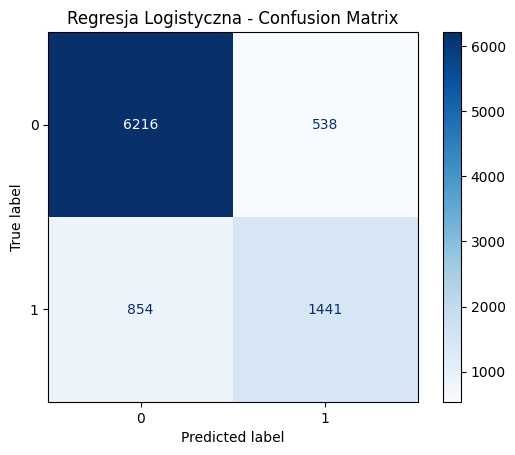

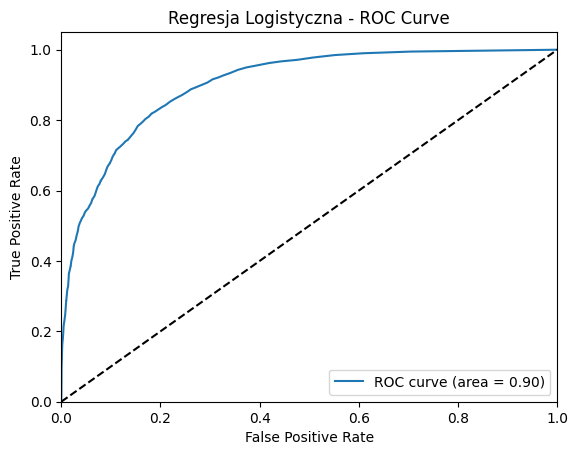

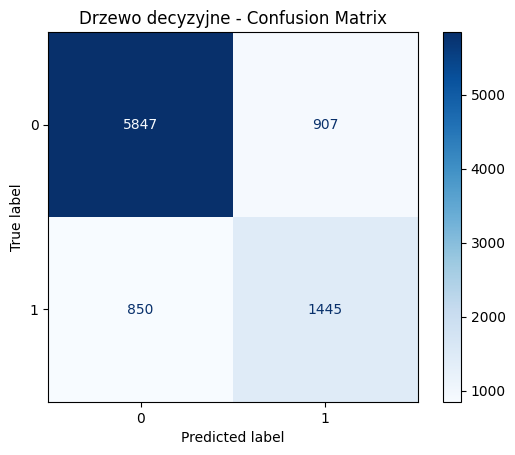

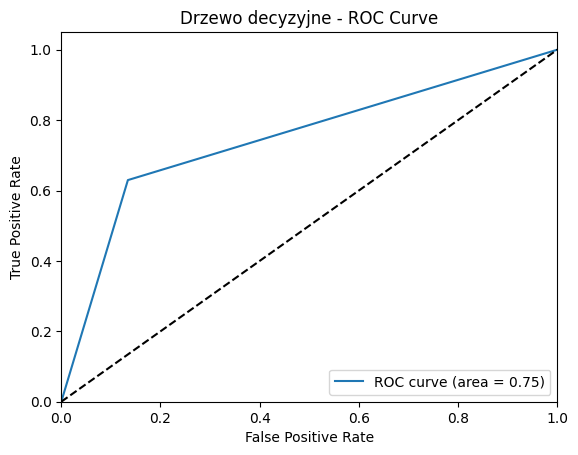

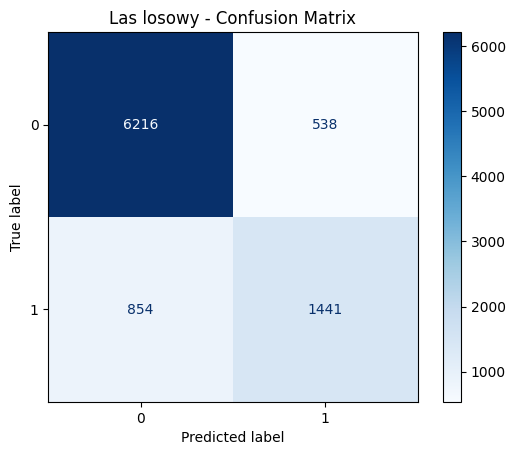

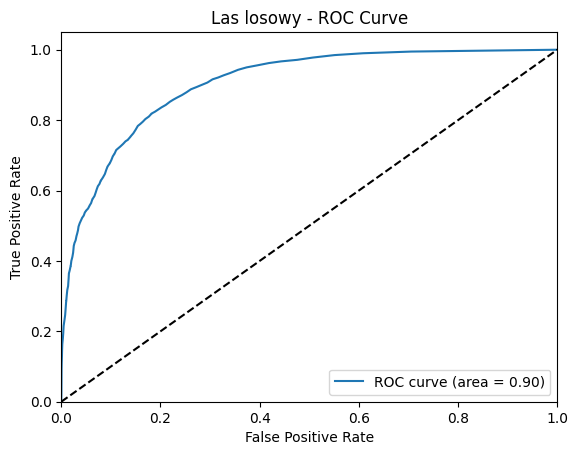

In [42]:
def plot_confusion_matrix(cm, model_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Generate and plot confusion matrices and ROC curves for each model
models = [
    ("Regresja Logistyczna", model),
    ("Drzewo decyzyjne", tree_model),
    ("Las losowy", forest_model)
]

for model_name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)
    plot_roc_curve(model, X_test, y_test, model_name)

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


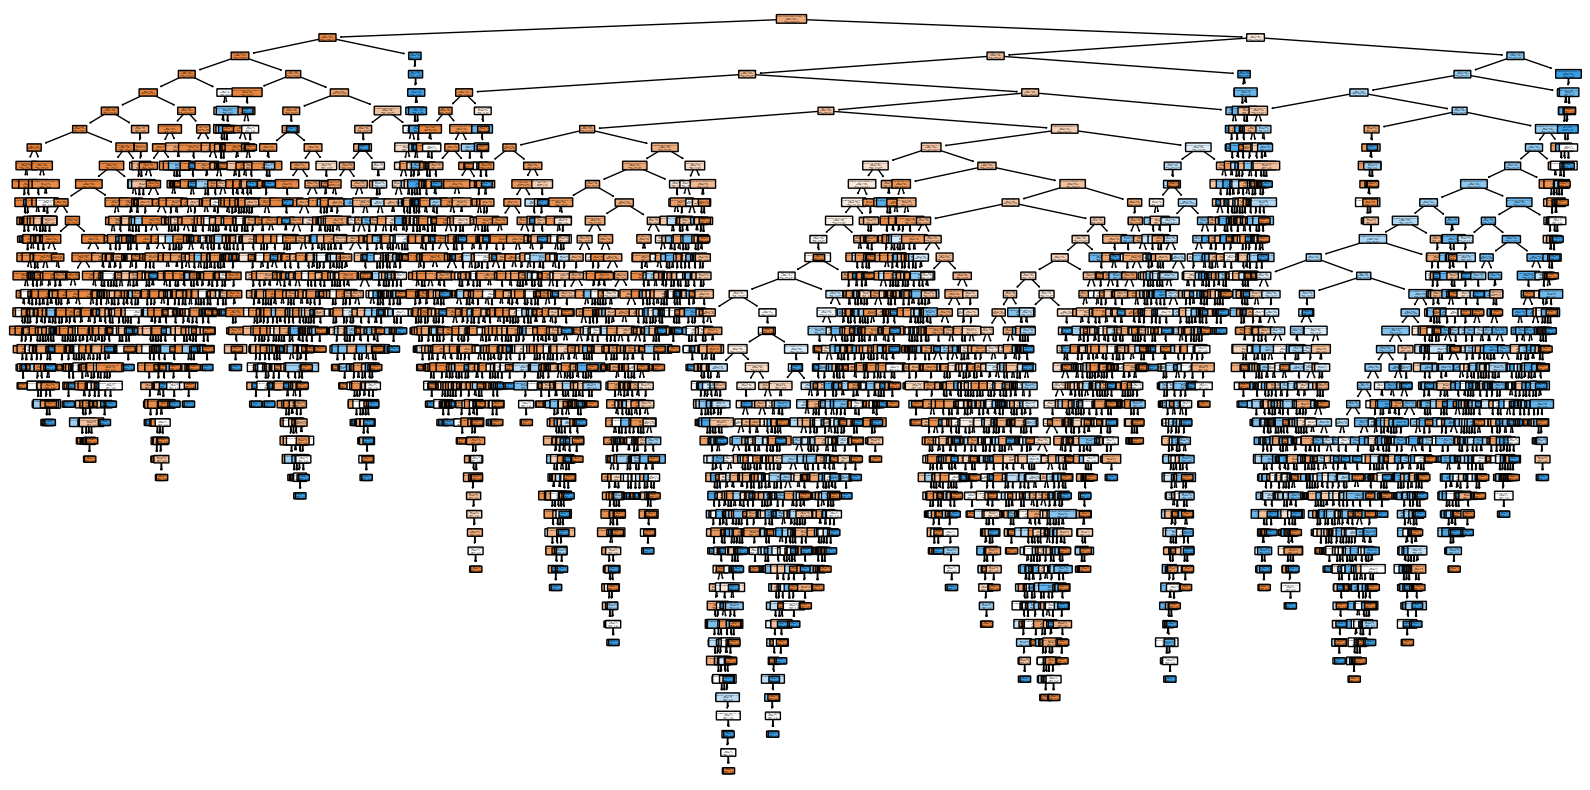

In [45]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], rounded=True)
plt.show()